# **Instagram Network Analysis** ☎**SNA Group Assignment**

<p align="left">
<img src ="https://thumbs.dreamstime.com/b/social-media-logos-facebook-twitter-instagram-youtube-flickr-vector-pg-transparent-background-high-resolution-linkedin-googleplus-210670466.jpgl" width ="800px" height ="200px">
</p>

# **Table of Contents**



>>[Introduction](#scrollTo=NaFM2-XSt_MW)

>>[Data Gathering](#scrollTo=jC_sW1rNujZl)

>>[Setting up the Environment](#scrollTo=QOK0vloOMQeB)

>>>>[Installing required libraries](#scrollTo=9o63IvmLMtMK)

>>>>[Setting up Working Directory](#scrollTo=1MYB6EKEM50G)

>>>>[Importing necessary libraries](#scrollTo=rEyRfBFXNKCY)

>>[Understanding the data](#scrollTo=QhpSfA0LXiu4)

>>>>[Variable Descriptions of Vertices Data Set](#scrollTo=nU62hzH9Z596)

>>>>[Analyzing the data set](#scrollTo=3YqT6h79SyAU)

>>>>[Unsupervised Machine Learning Algorithim](#scrollTo=hn9tV4TvR6Kk)

>>[Reducing the nodes and edges and creating the graph](#scrollTo=66afd3af)

>>[Analyzing the Network](#scrollTo=1NKuq2HVjntm)

>>>[How many users are not following and are not being followed by anyone from the reduced list?](#scrollTo=d1858695)

>>>[Creating Graphs](#scrollTo=1eb30f66)

>>>[Centrality Measures](#scrollTo=5e1d30b2)

>>>>[Degree In & Out Degree](#scrollTo=werLwIBkmg92)

>>>>[Diameter](#scrollTo=ce196fd2)

>>>>[Average path length](#scrollTo=5d96bcd8)

>>>>[Betweenness Centrality](#scrollTo=206e5ec7)

>>>[Accounts not followed by anyone](#scrollTo=0151c4aa)

>>>[Accounts not following anyone](#scrollTo=eae1782f)

>>>[PageRank](#scrollTo=c94dddfe)

>>[Information Diffusion](#scrollTo=8974bc64)

>>>[Creating Epidemic Model Using SIR](#scrollTo=a4632d07)

>[No Corre](#scrollTo=d26cfdc0)

>[No Corre](#scrollTo=f45bff25)



## Introduction
Our client is a shoe store called "Botas". It's main goal is to increase sales by a better advertisement, 
so they decided to find more platforms to advertise their shoes and stopped by the Instagram.
They hired us as data analysts to find the best possible influencer in the city to buy an instagram post from them.

## Data Gathering
We started our work with data gathering.
We found the instagram users with following hashtags: #iloveshoes, #niceshoes, #shoes
and gathered the data about nodes, edges and following features: num_posts, num_followers, num_following, 
engagement_grade, engagement_rate, followers_growth, outsiders

## Setting up the Environment

#### Installing required libraries

In [ ]:
! pip install python-igraph
! apt-get install libcairo2-dev libjpeg-dev libgif-dev
! pip install pycairo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libjpeg-dev is already the newest version (8c-2ubuntu8).
libcairo2-dev is already the newest version (1.15.10-2ubuntu0.1).
libgif-dev is already the newest version (5.1.4-2ubuntu0.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### Setting up Working Directory

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/SNA

/content/drive/MyDrive/SNA


#### Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx

from igraph import *
import igraph as ig
from igraph import Graph

import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

sns.set()

import pprint
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties
import re
import networkx as nx
import argparse
import collections
import scipy.optimize

## Understanding the data 
* We have to understand the the variables of our data set in order to take any decision.
* We import our vertices/nodes dataframe and analyze it to decide how many number of vertices we shoud keep (>74,000 vertices and 1,1 million edges was not possible due to computing power) and based on what variables. In order to do this we peform some exploratory analysis and cluster analysis.

In [ ]:
num_vertices = None # "None" means read whole file


vertices_df = pd.read_csv('data/Instagram User Stats_final.csv',delimiter=',', nrows = num_vertices)
del vertices_df['Unnamed: 0']


print(f'Vertices data sett has {vertices_df.shape[0]} observations and {vertices_df.shape[1]-1} features.')

Vertices data sett has 70409 observations and 8 features.


In [ ]:
vertices_df.head()

,id,pos,flr,flg,eg,er,fg,op,username
0,1,702,906,677,0.1891,6.070640,1.177860,14.8936,LeafyEqual606
1,2,160,386,713,0.1950,6.260800,0.094127,16.9811,SmoggyCampus867
2,3,851,20400,3700,0.0664,0.717416,2.242440,38.2166,HonestGazebo218
3,4,42,900,7500,0.0592,1.901230,7.643310,60.1626,FatherlyEquivalent813
4,5,50,486,4350,0.5112,16.409500,0.372900,61.9403,LopsidedPantry359



 #### Variable Descriptions of Vertices Data Set




|Variable | Description |
|-------|-------------|
|pos | num_vertices of posts |
| flr | num_vertices of Followers |
|flg | num_vertices of Following |
|eg | Engagement grade, a scale of 1 to 12 that reflects the strength of engagement rate relative to the num_vertices of followers |
 |er | Engagement Rate, i.e. likes+comments / followers |
| fg | Followers growth % in a month |
| op | Outsiders percentage %, i.e. non-followers that liked a post, divided by all unique likers |


In [ ]:
# We change the names for easier interpretability.

vertices_df.columns = ['id',
                       'num_posts',
                       'num_followers',
                       'num_following',
                       'engagement_grade',
                       'engagement_rate',
                       'followers_growth',
                       'outsiders',
                       'username']

In [ ]:
vertices_df.head()

,id,num_posts,num_followers,num_following,engagement_grade,engagement_rate,followers_growth,outsiders,username
0,1,702,906,677,0.1891,6.070640,1.177860,14.8936,LeafyEqual606
1,2,160,386,713,0.1950,6.260800,0.094127,16.9811,SmoggyCampus867
2,3,851,20400,3700,0.0664,0.717416,2.242440,38.2166,HonestGazebo218
3,4,42,900,7500,0.0592,1.901230,7.643310,60.1626,FatherlyEquivalent813
4,5,50,486,4350,0.5112,16.409500,0.372900,61.9403,LopsidedPantry359


#### Analyzing the data set
* We peform exploratory data analysis to understand how to reduce our dataframe so it doesn't become a random network.

In [ ]:
# Check types
vertices_df.dtypes

id                    int64
num_posts             int64
num_followers         int64
num_following         int64
engagement_grade    float64
engagement_rate     float64
followers_growth    float64
outsiders           float64
username             object
dtype: object

In [ ]:
# Check null values
vertices_df[vertices_df.isnull().any(axis=1)]

,id,num_posts,num_followers,num_following,engagement_grade,engagement_rate,followers_growth,outsiders,username


In [ ]:
# Create a list of attribute columns to loop over
attributes =  [x for x in vertices_df.columns if x not in ['id','username']]

In [ ]:
len(attributes)

7

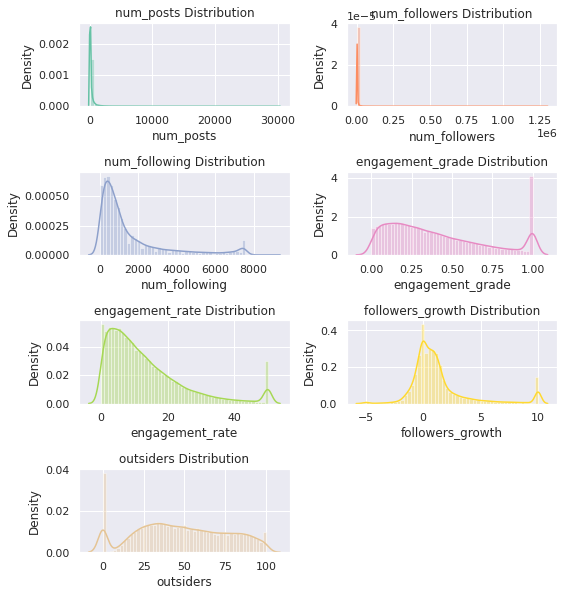

In [ ]:
# Plotting Distributions
import itertools
palette = itertools.cycle(sns.color_palette('Set2'))
plt.figure(figsize = (8,10))
for i, col in enumerate(vertices_df[attributes]):
    plt.subplot(5,2,i+1)
    sns.distplot(vertices_df[attributes][col],color=next(palette))
    plt.title(f'{col} Distribution', fontsize = 12)
    plt.tight_layout()

plt.show();

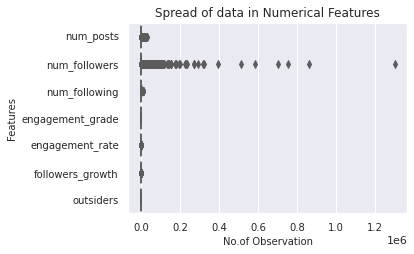

In [ ]:
plt.subplots(figsize = (5,3.5))
sns.boxplot(data = vertices_df[attributes], orient='h', palette=sns.color_palette('hls'))
plt.title('Spread of data in Numerical Features', size = 12)
plt.xlabel('No.of Observation', size = 10)
plt.ylabel('Features', size = 10)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.show()

In [ ]:
# Descriptive stastitcs so we can later compare with our reduced data set
vertices_df[attributes].describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
num_posts,70409.0,201.06,612.21,0.0,12.00,44.00,160.00,30200.0
num_followers,70409.0,1347.50,9354.81,1.0,243.00,548.00,1100.00,1300000.0
num_following,70409.0,1506.08,1786.14,0.0,392.00,814.00,1800.00,8800.0
engagement_grade,70409.0,0.39,0.29,0.0,0.16,0.32,0.57,1.0
engagement_rate,70409.0,13.08,11.48,0.0,4.70,9.91,17.93,50.0
followers_growth,70409.0,1.28,2.59,-5.0,-0.09,0.64,1.58,10.0
outsiders,70409.0,48.51,27.23,0.0,28.16,47.06,70.45,100.0


In [ ]:
# Count number of zeros in all columns 
for column_name in vertices_df.columns:
    column = vertices_df[column_name]
    count = (column == 0).sum()
    print('Count of zeros in column', column_name, 'is:', count)

Count of zeros in column id is: 0
Count of zeros in column num_posts is: 45
Count of zeros in column num_followers is: 0
Count of zeros in column num_following is: 9
Count of zeros in column engagement_grade is: 29
Count of zeros in column engagement_rate is: 29
Count of zeros in column followers_growth is: 4135
Count of zeros in column outsiders is: 5488
Count of zeros in column username is: 0


In [ ]:
# Finding outliers (in this case, we do NOT want to delete this)
def outlier_function(df_train, col_name):
    ''' this function detects first and third quartile and interquartile range for a given column of a dataframe
    then calculates upper and lower limits to determine outliers conservatively
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(np.array(df_train[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df_train[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(3*IQR)
    lower_limit = first_quartile-(3*IQR)
    outlier_count = 0
                      
    for value in df_train[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [ ]:
for col in attributes:
    if outlier_function(vertices_df, col)[2] > 0:
        print("There are {} outliers in {}".format(outlier_function(vertices_df, col)[2], col))

There are 5359 outliers in num_posts
There are 3158 outliers in num_followers
There are 3733 outliers in num_following
There are 4477 outliers in followers_growth


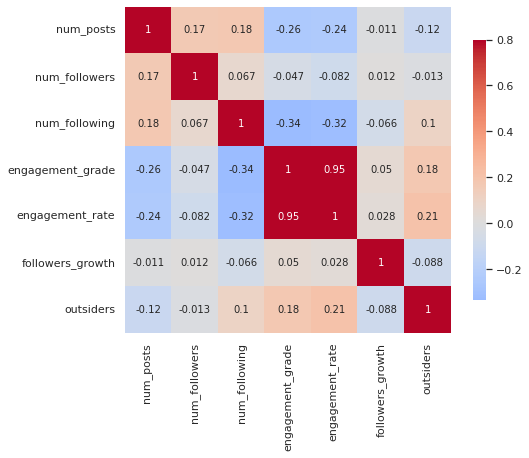

In [ ]:
# Correlation Matrix to identify potentially useful variable to reduce the number of vertices
corrmat =vertices_df[attributes].corr()
f, ax = plt.subplots(figsize = (8,6))
sns.heatmap(corrmat,vmax=0.8,square=True, center=0, annot=True, annot_kws={"size": 10}, cbar_kws={"shrink": .8},
            cmap=plt.cm.coolwarm);
plt.show()

In [ ]:
#! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
#from pandas_profiling import ProfileReport
#profile = ProfileReport(df)
#profile

#### Unsupervised Machine Learning Algorithim 


In [ ]:
# https://programminghistorian.org/en/lessons/clustering-with-scikit-learn-in-python
from sklearn.preprocessing import StandardScaler as SS # z-score standardization 
from sklearn.cluster import KMeans, DBSCAN # clustering algorithms
from sklearn.decomposition import PCA # dimensionality reduction
from sklearn.metrics import silhouette_score # used as a metric to evaluate the cohesion in a cluster
from sklearn.neighbors import NearestNeighbors # for selecting the optimal eps value when using DBSCAN
import numpy as np

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import SilhouetteVisualizer

In [ ]:
def silhouettePlot(range_, data):
    '''
    we will use this function to plot a silhouette plot that helps us to evaluate the cohesion in clusters (k-means only)
    '''
    half_length = int(len(range_)/2)
    range_list = list(range_)
    fig, ax = plt.subplots(half_length, 2, figsize=(15,8))
    for _ in range_:
        kmeans = KMeans(n_clusters=_, random_state=42)
        q, mod = divmod(_ - range_list[0], 2)
        sv = SilhouetteVisualizer(kmeans, colors="yellowbrick", ax=ax[q][mod])
        ax[q][mod].set_title("Silhouette Plot with n={} Cluster".format(_))
        sv.fit(data)
    fig.tight_layout()
    fig.show()
    fig.savefig("silhouette_plot.png")

In [ ]:
def elbowPlot(range_, data, figsize=(10,10)):
    '''
    the elbow plot function helps to figure out the right amount of clusters for a dataset
    '''
    inertia_list = []
    for n in range_:
        kmeans = KMeans(n_clusters=n, random_state=42)
        kmeans.fit(data)
        inertia_list.append(kmeans.inertia_)
        
    # plotting
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    sns.lineplot(y=inertia_list, x=range_, ax=ax)
    ax.set_xlabel("Cluster")
    ax.set_ylabel("Inertia")
    ax.set_xticks(list(range_))
    fig.show()
    fig.savefig("elbow_plot.png")


In [ ]:
def findOptimalEps(n_neighbors, data):
    '''
    function to find optimal eps distance when using DBSCAN; based on this article: https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc
    '''
    neigh = NearestNeighbors(n_neighbors=n_neighbors)
    nbrs = neigh.fit(data)
    distances, indices = nbrs.kneighbors(data)
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    plt.plot(distances)

In [ ]:
def progressiveFeatureSelection(df, n_clusters=3, max_features=4,):
    '''
    very basic implementation of an algorithm for feature selection (unsupervised clustering); inspired by this post: https://datascience.stackexchange.com/questions/67040/how-to-do-feature-selection-for-clustering-and-implement-it-in-python
    '''
    feature_list = list(df.columns)
    selected_features = list()
    # select starting feature
    initial_feature = ""
    high_score = 0
    for feature in feature_list:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        data_ = df[feature]
        labels = kmeans.fit_predict(data_.to_frame())
        score_ = silhouette_score(data_.to_frame(), labels)
        print("Proposed new feature {} with score {}". format(feature, score_))
        if score_ >= high_score:
            initial_feature = feature
            high_score = score_
    print("The initial feature is {} with a silhouette score of {}.".format(initial_feature, high_score))
    feature_list.remove(initial_feature)
    selected_features.append(initial_feature)
    for _ in range(max_features-1):
        high_score = 0
        selected_feature = ""
        print("Starting selection {}...".format(_))
        for feature in feature_list:
            selection_ = selected_features.copy()
            selection_.append(feature)
            kmeans = KMeans(n_clusters=n_clusters, random_state=42)
            data_ = df[selection_]
            labels = kmeans.fit_predict(data_)
            score_ = silhouette_score(data_, labels)
            print("Proposed new feature {} with score {}". format(feature, score_))
            if score_ > high_score:
                selected_feature = feature
                high_score = score_
        selected_features.append(selected_feature)
        feature_list.remove(selected_feature)
        print("Selected new feature {} with score {}". format(selected_feature, high_score))
    return selected_features

In [ ]:
cluster_df = vertices_df.copy()

In [ ]:
cluster_df.drop(columns = ['id', 'username'],inplace = True)

In [ ]:
scaler = SS()
DNP_authors_standardized = scaler.fit_transform(cluster_df)
df_standardized = pd.DataFrame(DNP_authors_standardized, columns=['num_posts', 'num_followers', 'num_following', 'engagement_grade',
       'engagement_rate', 'followers_growth', 'outsiders'])
df_standardized = df_standardized.set_index(cluster_df.index)

In [ ]:
#selected_features = progressiveFeatureSelection(df_standardized, max_features=3, n_clusters=3)

In [ ]:
#selected_features = ['num_followers', 'num_posts', 'num_following']

In [ ]:
df_standardized_sliced = df_standardized[['num_followers', 'num_posts']]

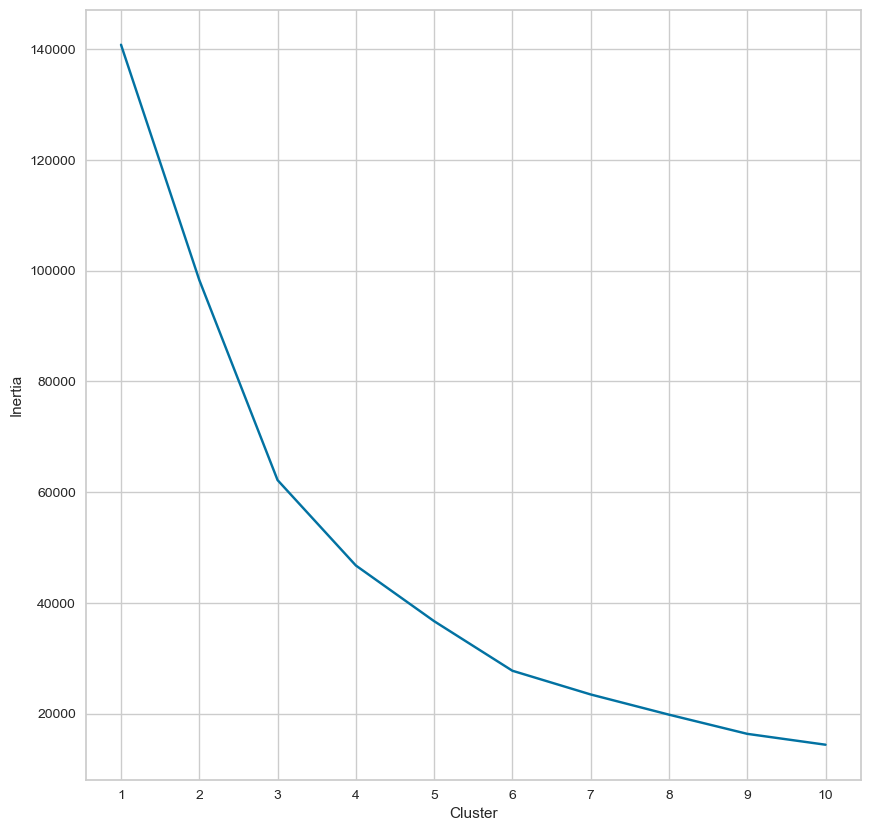

In [ ]:
elbowPlot(range(1,11), df_standardized_sliced)
plt.show()

In [ ]:
silhouettePlot(range(3,9), df_standardized_sliced)
plt.show()

KeyboardInterrupt: 

## Reducing the nodes and edges and creating the graph

In order to simplify our analysis, we will take the top 5% users regarding number of posts.

In [ ]:
#do 0.05
percentage = 0.05

In [ ]:
vertices_reduced = vertices_df.sort_values('num_posts', ascending = False)[0:round(len(vertices_df)*percentage)]

In [ ]:
import igraph as ig
from igraph import Graph

In [ ]:
g = Graph()

In [ ]:
g.add_vertices(vertices_reduced.index)

In [ ]:
print(g)

IGRAPH UN-- 3520 0 --
+ attr: name (v)


In [ ]:
edges_df = pd.read_csv('data/Network for IC-u LT-u.txt', delimiter = ' ', names = ['Source', 'Target', 'Weight'], skiprows=[0])

In [ ]:
# Making sure we only have the edges in our vertices reduced data frame
edges_df = edges_df[edges_df['Source'].isin(vertices_reduced.id.unique())]
edges_df = edges_df[edges_df['Target'].isin(vertices_reduced.id.unique())]

In [ ]:
print(f"There are {len(vertices_reduced['id'].unique())} unique users in our dataset= unique nodes")

There are 3520 unique users in our dataset= unique nodes


In [ ]:
reduced_df = pd.merge(vertices_reduced,edges_df,left_on ='id',right_on='Source',how = 'inner')
reduced_df= reduced_df[reduced_df['Target'].isin(vertices_reduced.id)]

In [ ]:
reduced_df['Source'] = reduced_df['Source'].astype(int)
reduced_df['Target'] = reduced_df['Target'].astype(int)
reduced_df

,id,num_posts,num_followers,num_following,engagement_grade,engagement_rate,followers_growth,outsiders,username,Source,Target,Weight
0,52660,30200,5200,1800,0.0050,0.073529,0.000000,56.0000,FlatTap75,52660,7336,0.000188
1,52660,30200,5200,1800,0.0050,0.073529,0.000000,56.0000,FlatTap75,52660,50246,0.000341
2,8919,30100,50700,1600,0.0972,0.758054,0.824058,36.5463,LegalFootwear138,8919,5095,0.001229
3,8919,30100,50700,1600,0.0972,0.758054,0.824058,36.5463,LegalFootwear138,8919,7027,0.003876
4,8919,30100,50700,1600,0.0972,0.758054,0.824058,36.5463,LegalFootwear138,8919,8835,0.003608
...,...,...,...,...,...,...,...,...,...,...,...,...
29750,11482,846,19600,7100,0.0247,0.266723,0.098619,59.2179,ThreadbareHate813,11482,41525,0.007161
29751,11482,846,19600,7100,0.0247,0.266723,0.098619,59.2179,ThreadbareHate813,11482,52010,0.003701
29752,11482,846,19600,7100,0.0247,0.266723,0.098619,59.2179,ThreadbareHate813,11482,52635,0.003364
29753,35975,846,1400,5700,0.0215,0.690476,1.469870,35.4839,HeftyMachine470,35975,624,0.001791


In [ ]:
reduced_df.shape

(29755, 12)

In [ ]:
vertices_reduced.rename(columns={"id": "Id", 'username': 'Label'}, inplace = True)
vertices_reduced.set_index('Id', inplace = True)
vertices_reduced.to_csv('gephi_nodes_final.csv')
vertices_reduced.head(1)

,num_posts,num_followers,num_following,engagement_grade,engagement_rate,followers_growth,outsiders,Label
Id,,,,,,,,
52660,30200,5200,1800,0.005,0.073529,0.0,56.0,FlatTap75


In [ ]:
edges_df.set_index('Source', inplace = True)
edges_df.to_csv('gephi_edges_final.csv')

## Analyzing the Network

### How many users are not following and are not being followed by anyone from the reduced list?

In [ ]:
vertices_reduced.head()

,num_posts,num_followers,num_following,engagement_grade,engagement_rate,followers_growth,outsiders,Label
Id,,,,,,,,
52660,30200,5200,1800,0.0050,0.073529,0.000000,56.0000,FlatTap75
8919,30100,50700,1600,0.0972,0.758054,0.824058,36.5463,LegalFootwear138
20432,27400,238200,7000,0.0036,0.025609,10.000000,16.1804,MilkyThong936
19538,25900,22100,4900,0.0038,0.040975,-0.259217,100.0000,PrimaryHurdler443
17016,22500,1200,7500,0.0001,0.004630,1.309500,0.0000,GlamorousProfessor655


In [ ]:
print(f"There are {len(vertices_reduced.index.unique()) - len(np.unique(list(reduced_df['Source'])+list(reduced_df['Target'])))} users disconnected from the network i.e. not following anyone/not being followed")

There are 256 users disconnected from the network i.e. not following anyone/not being followed


In [ ]:
print(f'There are {vertices_reduced.index.nunique()} unique users i.e. nodes in our graph')

There are 3520 unique users i.e. nodes in our graph


In [ ]:
print(f"Number of users that have followers {edges_df['Target'].nunique()}")

Number of users that have followers 3146


In [ ]:
edges_df['edges'] = list(zip(edges_df.index, edges_df.Target))

In [ ]:
vertices_reduced.reset_index(inplace=True)

In [ ]:
edges_df.reset_index(inplace=True)

### Creating Graphs

In [ ]:
%matplotlib inline

In [ ]:
from igraph import *
import igraph as ig
import pandas as pd

In [ ]:
g_data = Graph.DataFrame(edges=edges_df, vertices=vertices_reduced, directed=True)

In [ ]:
summary(g_data)

IGRAPH DN-- 3520 29755 -- 
+ attr: Label (v), engagement_grade (v), engagement_rate (v), followers_growth (v), name (v), num_followers (v), num_following (v), num_posts (v), outsiders (v), Weight (e), edges (e)


### Centrality Measures

Who are the most important instaram users for expanding our  shoe company? Centrality measures gives you a clear idea of the importance of any nodes.
Some users might not have a huge number of followers but still be important in the network being the connecting nodes between clusters of users.






In [ ]:
g_data.vs["betweenness"] = g_data.vs.betweenness()
g_data.vs["closeness"] = g_data.vs.closeness()



g_data.vs['page_rank_weighted'] = g_data.personalized_pagerank(weights='Weight')
g_data.vs['page_rank'] = g_data.personalized_pagerank()

g_data.vs['transitivity'] = g_data.transitivity_local_undirected()
g_data.vs['reciprocity'] = g_data.is_mutual()

g_data.vs['is_loop'] = g_data.is_loop()

g_data.vs['in_degree'] = g_data.degree(mode='in')
g_data.vs['out_degree'] = g_data.degree(mode='out')
g_data.vs['total_degree'] = g_data.degree(mode='all')

g_data.vs['in_degree_ratio'] = pd.Series(g_data.vs['in_degree'])/pd.Series(g_data.vs['total_degree'])
g_data.vs['out_degree_ratio'] = pd.Series(g_data.vs['out_degree'])/pd.Series(g_data.vs['total_degree'])

g_data.vs['strength_weighted_in']= g_data.strength(mode='in',weights='Weight')
g_data.vs['strength_weighted_out']= g_data.strength(mode='out',weights='Weight')

g_data.vs['strength_weighted_difference'] = pd.Series(g_data.vs['strength_weighted_in']) - pd.Series(g_data.vs['strength_weighted_out'])

g_data.vs['avg_strength_weighted_in']= pd.Series(g_data.strength(mode='in',weights='Weight')) / pd.Series(g_data.degree(mode='in'))
g_data.vs['avg_strength_weighted_out']= pd.Series(g_data.strength(mode='out',weights='Weight')) / pd.Series(g_data.degree(mode='out'))
node_df = pd.DataFrame({attr: g_data.vs[attr] for attr in g_data.vertex_attributes()})
#node_df_largest = pd.DataFrame({attr: largest.vs[attr] for attr in largest.vertex_attributes()})

In [ ]:
G = nx.from_pandas_edgelist(edges_users_df, source='source_u', target='target_u', edge_attr='Weight', create_using=nx.DiGraph())

#### (In & Out) Degree Centrality


**Degree**: it shows the total number of connections: follows + followers

In [ ]:
g_data.vs["degree"]=g_data.degree(mode='all')

In [ ]:
print(f"The node with the highest number of connections is {max(g_data.vs['degree'])}, i.e. the user with most followers and follows") # num_vertices of followers of greatest influencer

The node with the highest number of connections is 402, i.e. the user with most followers and follows


**In Degree**: it shows the total number of followers from within network

In [ ]:
g_data.vs['in_degree'] = g_data.indegree(mode = 'all')

In [ ]:
print(f"The node with the highest number of incoming connections i.e. follows has {max(g_data.vs['in_degree'])} i.e. our most popular user has this number of follows")

The node with the highest number of incoming connections i.e. follows has 68 i.e. our most popular user has this number of follows


The num_followers column shows some users have more actual followers than the user with the highest in_degree. The in_degree metric actually refers to how many users from within the network follow this user.

In [ ]:
node_df.sort_values(by=["in_degree"], ascending=False).head(5)

,name,num_posts,num_followers,num_following,engagement_grade,engagement_rate,followers_growth,outsiders,Label,betweenness,closeness,page_rank_weighted,page_rank,transitivity,reciprocity,is_loop,in_degree,out_degree,total_degree,in_degree_ratio,out_degree_ratio,strength_weighted_in,strength_weighted_out,strength_weighted_difference,avg_strength_weighted_in,avg_strength_weighted_out
3504,4025,848,1500,5900,0.0108,0.348148,8.823530,76.6667,OtherCounseling714,15750.564319,0.398009,0.000305,0.000864,0.170764,False,False,68,3,71,0.957746,0.042254,0.183707,0.001184,0.182523,0.002702,0.000395
3057,4077,938,2800,3500,0.0525,0.944444,4.812830,16.2791,MotherlySnack227,121822.497604,0.381014,0.000737,0.002306,0.141650,False,False,67,25,92,0.728261,0.271739,0.057445,0.082785,-0.025340,0.000857,0.003311
189,6259,4800,23200,5900,0.0104,0.112787,-0.075739,33.3333,PrudentPost315,182261.538538,0.427986,0.000168,0.000615,0.104891,False,False,65,64,129,0.503876,0.496124,0.093834,0.036938,0.056896,0.001444,0.000577
17,13978,14400,33200,7300,0.0115,0.106760,-0.415225,25.0000,DirectPreparation334,166420.734561,0.413718,0.000311,0.000886,0.063931,True,False,56,97,153,0.366013,0.633987,0.077575,0.091132,-0.013557,0.001385,0.000940
3393,795,867,1900,7300,0.0255,0.818713,1.035200,89.2857,AchHockey163,30662.121214,0.354803,0.001427,0.003749,0.104545,False,False,56,7,63,0.888889,0.111111,0.017910,0.004452,0.013458,0.000320,0.000636


The following are the users who are not being followed by anyone in our network.

In [ ]:
node_df[node_df['in_degree']==0][['Label', 'in_degree']]

,Label,in_degree
12,VibrantCanon494,0
24,BogusReview160,0
74,ClumsySaloon358,0
75,Well-GroomedNightmare391,0
80,TrivialMemory322,0
...,...,...
3471,OrderlyExperience119,0
3483,LopsidedAss732,0
3508,AcrobaticMargin143,0
3509,HoarseLoophole757,0


**Out-Degree**: it shows the total number of follows


In [ ]:
g_data.vs['out_degree'] = g_data.outdegree(mode = 'all')

In [ ]:
print(f"The node with the highest number of outgoing connections follows {max(g_data.vs['out_degree'])} users, i.e. the most gregarious node") 

The node with the highest number of outgoing connections follows 398 users, i.e. the most gregarious node


The num_following column shows some users follow more users than the user with the highest out_degree. The out_degree metric actually refers to how many users from within the network this user follows.

In [ ]:
node_df.sort_values(by=["out_degree"], ascending=False).head(5)

,name,num_posts,num_followers,num_following,engagement_grade,engagement_rate,followers_growth,outsiders,Label,betweenness,...,in_degree,out_degree,total_degree,in_degree_ratio,out_degree_ratio,strength_weighted_in,strength_weighted_out,strength_weighted_difference,avg_strength_weighted_in,avg_strength_weighted_out
1956,56340,1300,584600,408,0.4001,2.760760,2.69741,77.7778,WonderfulPancreas742,49464.387356,...,4,398,402,0.009950,0.990050,0.273011,11.874100,-11.601089,0.068253,0.029834
1295,50222,1700,753900,1200,0.5134,3.542570,2.05649,93.3110,SlimFormula718,26415.024170,...,6,359,365,0.016438,0.983562,0.171727,11.607234,-11.435507,0.028621,0.032332
789,5095,2300,17400,412,0.1619,1.748080,2.52448,20.9251,PiercingLayer155,355952.279337,...,38,350,388,0.097938,0.902062,0.075892,5.482271,-5.406378,0.001997,0.015664
2,20432,27400,238200,7000,0.0036,0.025609,10.00000,16.1804,MilkyThong936,277292.704916,...,31,340,371,0.083558,0.916442,0.226485,0.107252,0.119233,0.007306,0.000315
15,30650,14700,269800,479,0.1301,1.131950,1.79439,85.0004,LegitimatePlug678,35787.715761,...,7,322,329,0.021277,0.978723,0.196539,2.795501,-2.598962,0.028077,0.008682


**Distribution of the followers by degree, out-degree and in-degree**

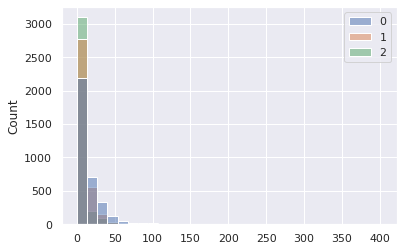

In [ ]:
sns.histplot([g_data.degree(mode='all'),g_data.indegree(mode = 'all'),g_data.outdegree(mode = 'all')], bins = 30)

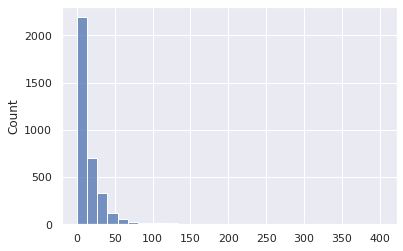

In [ ]:
sns.histplot(g_data.vs['degree'], bins = 30)

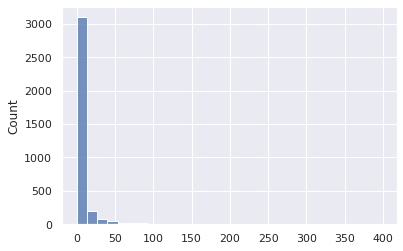

In [ ]:
sns.histplot(g_data.vs['out_degree'], bins = 30)

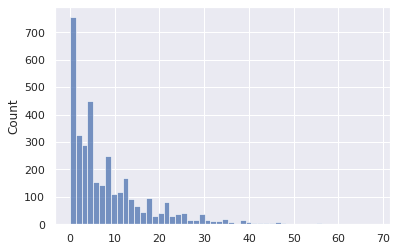

In [ ]:
sns.histplot(g_data.vs['in_degree'])

#### Closeness Centrality
Refers to how close a user is to the rest of the graph. In this case, this centrality measure doesn't give us the most important user (however, it is used in transportation networks as you are not interested in a node that is connected to other places but tht I am able to go really fast even if I am not highly connected) based on the distance to the rest of the nodes.  It expresses how near a node is to the others by measuring the length of the shortest pathways connecting the vertices.


In [ ]:
 print(f'{max(nx.closeness_centrality(G))} is the user nearest others')

WryCeramic690 is the user nearest others


**NO SALE BIEN ABAJO**

In [ ]:
#node_df.sort_values(by=["closeness"], ascending=False).head(5)

,name,num_posts,num_followers,num_following,engagement_grade,engagement_rate,followers_growth,outsiders,Label,betweenness,closeness,page_rank_weighted,page_rank,transitivity,reciprocity,is_loop,in_degree,out_degree,total_degree,in_degree_ratio,out_degree_ratio,strength_weighted_in,strength_weighted_out,strength_weighted_difference,avg_strength_weighted_in,avg_strength_weighted_out
69,68913,6900,6400,332,0.3112,4.575000,-1.116900,18.2213,DiligentInsolence279,0.0,1.0,0.000121,0.000114,NaN,True,False,1,0,1,1.000000,0.000000,0.048411,0.000000,0.048411,0.048411,NaN
1282,68912,1700,1100,700,0.0415,1.333330,0.000000,72.5000,PrettyForay814,0.0,1.0,0.000065,0.000061,NaN,False,False,0,1,1,0.000000,1.000000,0.000000,0.048411,-0.048411,NaN,0.048411
1974,36018,1300,347,646,0.2339,7.508810,0.416450,37.2549,ConcreteVoter124,0.0,1.0,0.000435,0.000410,NaN,False,False,1,1,2,0.500000,0.500000,0.175483,0.192632,-0.017150,0.175483,0.192632
1345,5464,1700,2500,4200,0.0498,0.895556,0.934900,61.6822,FluidSkywalk643,2.0,1.0,0.000121,0.000114,0.0,True,False,1,2,3,0.333333,0.666667,0.050715,0.178439,-0.127725,0.050715,0.089220
2971,1864,958,506,3300,0.1380,4.429200,0.688489,27.9070,WealthyStorm605,0.0,1.0,0.000065,0.000061,NaN,False,False,0,1,1,0.000000,1.000000,0.000000,0.175099,-0.175099,NaN,0.175099


#### Eigenvector Centrality

Eigenvector centrality considers the relevance of the surrounding nodes and computes the centrality of a vertex based on the centrality of its neighbors. In technical terms, the metric is proportional to the total of connection centralities.

In [ ]:
max(nx.eigenvector_centrality(G))

'WryCeramic690'

#### Betweenness Centrality

This refers to the user that has the most importance because of the connections it has, its the node that has more connections to the network. This is the node that has the highest number of shared paths within the network.

In [ ]:
max(nx.betweenness_centrality(G))

'WryCeramic690'

In [ ]:
pd.set_option('display.max_columns', 500)
node_df.sort_values(by=["betweenness"], ascending=False).head(5)

,name,num_posts,num_followers,num_following,engagement_grade,engagement_rate,followers_growth,outsiders,Label,betweenness,closeness,page_rank_weighted,page_rank,transitivity,reciprocity,is_loop,in_degree,out_degree,total_degree,in_degree_ratio,out_degree_ratio,strength_weighted_in,strength_weighted_out,strength_weighted_difference,avg_strength_weighted_in,avg_strength_weighted_out
23,5124,12400,11400,337,0.1034,1.116470,1.677100,11.1345,JovialSpeaker297,423279.058596,0.409482,0.000147,0.000660,0.038078,True,False,44,258,302,0.145695,0.854305,0.044973,2.941981,-2.897008,0.001022,0.011403
789,5095,2300,17400,412,0.1619,1.748080,2.524480,20.9251,PiercingLayer155,355952.279337,0.433021,0.000125,0.000341,0.020410,True,False,38,350,388,0.097938,0.902062,0.075892,5.482271,-5.406378,0.001997,0.015664
346,12007,3500,22500,6800,0.0671,0.724691,0.078321,39.5062,SuspiciousFilly631,334167.872499,0.399482,0.000353,0.000759,0.074908,False,False,41,90,131,0.312977,0.687023,0.079906,0.380115,-0.300210,0.001949,0.004224
2103,19188,1200,292900,2900,0.0560,0.487083,1.371740,22.6410,GorgeousEcology542,313926.565849,0.428950,0.000282,0.000294,0.038037,False,False,29,220,249,0.116466,0.883534,0.182560,0.909574,-0.727014,0.006295,0.004134
2,20432,27400,238200,7000,0.0036,0.025609,10.000000,16.1804,MilkyThong936,277292.704916,0.440860,0.000443,0.000411,0.024478,False,False,31,340,371,0.083558,0.916442,0.226485,0.107252,0.119233,0.007306,0.000315


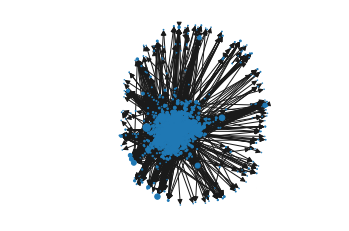

In [ ]:
size = list(nx.degree_centrality(G).values())
size = [x * 1000 for x in size]
labels_filtered = {k: v for k, v in 
    nx.degree_centrality(G).items() if v > 0.5 }
labels = {} 
for k, v in labels_filtered.items(): 
    labels[k] = k

nx.draw_networkx(G, node_size= size, 
                 labels=labels)

pos=nx.shell_layout(G)
x_values, y_values = zip(*pos.values())
x_max = max(x_values)
x_min = min(x_values)
x_margin = (x_max - x_min) * 0.40
plt.xlim(x_min - x_margin, x_max + x_margin)
plt.box(False)
plt.show()

### Diameter
Shortest path between the two furthest nodes

In [ ]:
g_data.diameter()
print(g_data.diameter())

14


### Average path length
When evaluating pathways and reachability, you may be curious about the distances in your graph. What is the average path length of a social network, or, in other words, what is the average of the shortest distance between each pair of vertices in the graph?


In [ ]:
print(g_data.average_path_length())

4.658973121766975


### Density
One of the most used measurements is graph density, which accounts for the fraction of edges compared to all potential linkages in the network. Simply said, the density tells us from 0 to 1 how linked the nodes of a graph are.

In [ ]:
 print(nx.density(G))

0.0027937833883170185


### Transitivity
Linking behaviour determines how links (edges) are formed in social graph. Transitivity is when a friend of my friend is my friend. Normally social networks are really transitive. It is measured by counting the number of triangles x 3 over number of connected triplets.

In [ ]:
GU = nx.from_pandas_edgelist(edges_users_df, source='source_u', target='target_u', edge_attr='Weight')

In [ ]:
print(f'There is a {round(nx.transitivity(G),4)*100} % probability that two users are friends when they have a common contact') 

There is a 8.7 % probability that two users are friends when they have a common contact


In [ ]:
node_df.sort_values(by=["transitivity"], ascending=False).head(5)

,name,num_posts,num_followers,num_following,engagement_grade,engagement_rate,followers_growth,outsiders,Label,betweenness,closeness,page_rank_weighted,page_rank,transitivity,reciprocity,is_loop,in_degree,out_degree,total_degree,in_degree_ratio,out_degree_ratio,strength_weighted_in,strength_weighted_out,strength_weighted_difference,avg_strength_weighted_in,avg_strength_weighted_out
220,42211,4400,988,990,0.0109,0.348628,10.000000,20.0000,WebbedSkin677,0.000000,0.311083,0.000426,0.000094,1.0,True,False,2,0,2,1.000000,0.000000,0.036708,0.000000,0.036708,0.018354,NaN
392,49092,3300,354,336,0.1082,3.472920,-0.385455,27.1186,Ill-InformedPriesthood422,0.000000,0.291408,0.000083,0.000070,1.0,False,False,2,0,2,1.000000,0.000000,0.246895,0.000000,0.246895,0.123448,NaN
1897,32281,1300,45200,2200,0.0634,0.589971,1.729880,31.4031,PointlessMinion137,0.000000,0.249346,0.000138,0.000076,1.0,False,False,2,0,2,1.000000,0.000000,0.722407,0.000000,0.722407,0.361204,NaN
2884,62325,981,3000,1400,1.0000,19.390700,4.573170,42.4918,MatureIncompetence988,140.545023,0.232386,0.000324,0.000162,1.0,False,False,2,2,4,0.500000,0.500000,0.163439,0.104193,0.059247,0.081720,0.052096
3005,42139,950,662,597,0.0554,1.779120,0.385802,14.0625,ActiveBucket599,367.802947,0.314863,0.000075,0.000063,1.0,False,False,2,1,3,0.666667,0.333333,0.015542,0.009328,0.006214,0.007771,0.009328


### Reciprocity
When I follow you, you follow me back. The more it happens in the graph, the more  reciprocity it has.


In [ ]:
print(f'{round(nx.reciprocity(G),4)*100}% of users follow and are followed back in our network')

19.45% of users follow and are followed back in our network


In [ ]:
node_df['reciprocity'].value_counts()

False    2683
True      837
Name: reciprocity, dtype: int64

### Visual Analysis

In [ ]:
vertices_reduced.rename(columns={"Id": "id", 'Label': 'username'}, inplace = True)
edges_df.rename(columns={"Source": "id", 'Target': 'target'}, inplace = True)

In [ ]:
edges_users_df = pd.merge(
    vertices_df[['id', 'username']], edges_df, how="left", on=["id"]
 )
edges_users_df = pd.merge(
    vertices_df[['id', 'username']], edges_users_df, how="left", left_on=["id"], right_on=['target']
 )
del edges_users_df['target']
edges_users_df.rename(columns={"id_x": "id_source",
                               "id_y": "id_target",
                               'target': 'Target',
                               'username_x': 'source_u',
                               'username_y': 'target_u' }, inplace = True)
edges_users_df.dropna(inplace=True)
edges_users_df['id_target'] = edges_users_df['id_target'].astype(int)

Density: 0.0027937833883170185
Average In Degree 9.11611519607843
Average Out Degree 9.11611519607843
Average Shortest Path Length 4.657110613959689


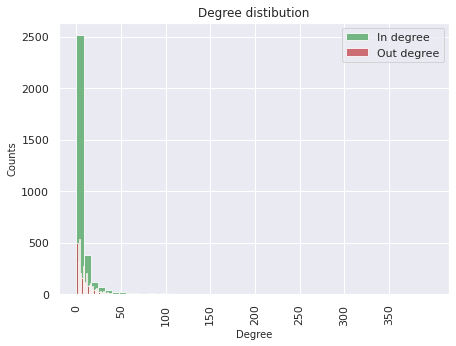

In [ ]:
import numpy as np
# get density of network:
print("Density: %s" % nx.density(G))

# plot in_and out degree distribution
in_degree_sequence = sorted([d for n, d in G.in_degree()], reverse=True)  # in_degree sequence
in_degreeCount = collections.Counter(in_degree_sequence)
in_deg, in_cnt = zip(*in_degreeCount.items())
print("Average In Degree %s" % (sum(in_degree_sequence) / len(in_degree_sequence)))

out_degree_sequence = sorted([d for n, d in G.out_degree()], reverse=True)  # out_degree sequence
out_degreeCount = collections.Counter(out_degree_sequence)
out_deg, out_cnt = zip(*out_degreeCount.items())
print("Average Out Degree %s" % (sum(out_degree_sequence) / len(out_degree_sequence)))



plt.figure(figsize = (7,5))
max_degree = max(max(out_degree_sequence), max(in_degree_sequence))
bins = 50
plt.hist(in_degree_sequence, bins, alpha=0.8, label='In degree', color="g")
plt.hist(out_degree_sequence, bins, alpha=0.8, label='Out degree', color="r")
plt.title("Degree distibution",size = 12)
plt.xlabel("Degree",size = 10)
plt.ylabel("Counts",size= 10)
plt.xticks(np.arange(0, max_degree + 1, step=50), rotation=90)
plt.legend(loc='upper right')
#plt.show()
plt.savefig("degree_distribution.png", dpi=300)

# get average shortest path length
path_lengths = []
for v in G.nodes():
    spl = dict(nx.single_source_shortest_path_length(G, v))
    for p in spl:
        path_lengths.append(spl[p])

print("Average Shortest Path Length %s" % (sum(path_lengths) / len(path_lengths)))

### Accounts not followed by anyone

In [ ]:
accounts_with_zero_following=[]
for id,val in (G.out_degree):
    if val==0:
        accounts_with_zero_following.append((id, G.in_degree(id)))
        
accounts_with_0_following_sorted = sorted(accounts_with_zero_following, key=lambda x:x[1], reverse=True)

The following DataFrame contains all users that are not followed by anyone on the network

In [ ]:
pd.DataFrame(accounts_with_0_following_sorted, columns=['Account','Following count']).head(5)

,Account,Following count
0,FastCyclone65,96
1,Well-LitHuman480,78
2,NoisyMaid872,49
3,MeaslyAlpenhorn928,48
4,QuixoticAzimuth278,35


### Accounts not following anyone

In [ ]:
accounts_with_zero_followers=[]
for id,val in (G.in_degree):
    if val==0:
        accounts_with_zero_followers.append((id,G.out_degree(id)))
        
accounts_with_0_followers_sorted = sorted(accounts_with_zero_followers, key=lambda x:x[1], reverse=True)

The following DataFrame contains all users that are not following anyone on the network

In [ ]:
pd.DataFrame(accounts_with_0_followers_sorted, columns=['Account','Follower count']).head(5)

,Account,Follower count
0,WiseHurdle80,29
1,ScholarlyHabitat300,29
2,CultivatedTshirt365,29
3,TornElimination216,28
4,FrizzyBabe198,25


###  PageRank
Most important Node According to the algorithm.

In [ ]:
ppr1 = nx.pagerank(G, alpha=0.85, personalization=None, max_iter=100, tol=1e-06, nstart=None, weight='weight', dangling=None)

In [ ]:
max(ppr1.items(), key = lambda k : k[1])

('JovialSpeaker297', 0.011770581691008654)

In [ ]:
print(f"The most important person according to PageRank is {max(ppr1.items(), key = lambda k : k[1])[0]}")

The most important person according to PageRank is JovialSpeaker297


Below are the top 5 most important persons according to PageRank.

In [ ]:
import heapq
heapq.nlargest(5, ppr1, key=ppr1.get)

['JovialSpeaker297',
 'PiercingLayer155',
 'SlimFormula718',
 'WonderfulPancreas742',
 'PowerfulFuton102']

In [ ]:
print("Neighbors of JovialSpeaker297", [n for n in G.neighbors("JovialSpeaker297")])

Neighbors of JovialSpeaker297 ['NaturalMultimedia960', 'OverduePitching571', 'Black-And-WhiteCephalopod883', 'CloseCitizenship193', 'MotherlySnack227', 'OilyStiletto374', 'JovialSunbonnet174', 'Black-And-WhiteBead198', 'GloriousSuccess341', 'GlumClick952', 'PiercingLayer155', 'FantasticElver367', 'VisibleVariable969', 'AverageDickey915', 'BareRag130', 'MatureMotherinlaw757', 'GlossyMime471', 'VastDrawing511', 'VisibleEyelids581', 'Well-To-DoFly714', 'FluffyFaithful726', 'CrookedWashbasin369', 'OblongHeel181', 'FreeEstuary855', 'StarchyBrass268', 'CommonBlessing274', 'UnsightlyTrench336', 'PertinentClipper121', 'UnfinishedCensus220', 'AccurateBicycle98', 'ObedientTeenager190', 'AdventurousVenom477', 'FatalPenis829', 'GrownPantology81', 'AgedIllness365', 'FatalFlume328', 'ThunderousComparison364', 'OutstandingTesting635', 'BriefPuggle783', 'WidePattypan609', 'CleanTrunk182', 'RipeBlog221', 'SerpentineLeisure819', 'LooseLink106']


In [ ]:
node_df.sort_values(by=["page_rank_weighted"], ascending=False).head(5)

,name,num_posts,num_followers,num_following,engagement_grade,engagement_rate,followers_growth,outsiders,Label,betweenness,closeness,page_rank_weighted,page_rank,transitivity,reciprocity,is_loop,in_degree,out_degree,total_degree,in_degree_ratio,out_degree_ratio,strength_weighted_in,strength_weighted_out,strength_weighted_difference,avg_strength_weighted_in,avg_strength_weighted_out
3077,18586,935,3500,6600,0.0348,0.626984,0.551471,33.7838,PlaintiveBlade198,28379.938717,0.342679,0.002391,0.002378,0.057895,False,False,17,12,29,0.586207,0.413793,0.038274,0.035485,0.002789,0.002251,0.002957
1500,12918,1600,1500,6200,0.0406,1.303700,1.115400,64.1667,FlusteredRite388,5052.116134,0.386147,0.002265,0.001766,0.113415,False,False,40,2,42,0.952381,0.047619,0.083955,0.006812,0.077142,0.002099,0.003406
1909,11159,1300,3200,7500,0.0428,0.770833,10.000000,67.0000,Quick-WittedVanilla237,16599.848508,0.342824,0.002264,0.001287,0.180952,False,False,14,5,19,0.736842,0.263158,0.183161,0.010252,0.172909,0.013083,0.002050
1859,18537,1368,2200,6488,0.0062,0.111111,0.855400,54.5455,RoundHygienic601,26062.436525,0.347756,0.002209,0.004003,0.064103,True,False,52,5,57,0.912281,0.087719,0.006483,0.001872,0.004610,0.000125,0.000374
801,42653,2200,1400,3800,0.0070,0.226190,7.100590,10.0000,GloriousQuinoa940,2646.207291,0.329736,0.002072,0.000419,0.166667,False,False,9,1,10,0.900000,0.100000,0.233352,0.010401,0.222951,0.025928,0.010401


In [ ]:
node_df.sort_values(by=["page_rank"], ascending=False).head(5)

,name,num_posts,num_followers,num_following,engagement_grade,engagement_rate,followers_growth,outsiders,Label,betweenness,closeness,page_rank_weighted,page_rank,transitivity,reciprocity,is_loop,in_degree,out_degree,total_degree,in_degree_ratio,out_degree_ratio,strength_weighted_in,strength_weighted_out,strength_weighted_difference,avg_strength_weighted_in,avg_strength_weighted_out
1859,18537,1368,2200,6488,0.0062,0.111111,0.855400,54.5455,RoundHygienic601,26062.436525,0.347756,0.002209,0.004003,0.064103,True,False,52,5,57,0.912281,0.087719,0.006483,0.001872,0.004610,0.000125,0.000374
3393,795,867,1900,7300,0.0255,0.818713,1.035200,89.2857,AchHockey163,30662.121214,0.354803,0.001427,0.003749,0.104545,False,False,56,7,63,0.888889,0.111111,0.017910,0.004452,0.013458,0.000320,0.000636
858,28729,2100,3900,6900,0.0059,0.106838,-0.938086,74.5098,FailingHallway628,55907.745585,0.333505,0.001081,0.003408,0.033688,False,False,45,9,54,0.833333,0.166667,0.009784,0.001675,0.008109,0.000217,0.000186
1236,6430,1789,1400,5927,0.0187,0.599206,1.381900,26.9841,ModernCyclone205,256.972919,0.342715,0.001875,0.003396,0.065934,True,False,14,1,15,0.933333,0.066667,0.035046,0.000541,0.034505,0.002503,0.000541
449,10061,3100,3000,7500,0.0460,0.827778,1.264700,16.1290,PitifulBail237,181.178490,0.387301,0.001779,0.003169,0.146237,False,False,31,1,32,0.968750,0.031250,0.169837,0.001099,0.168738,0.005479,0.001099


## Community Detection

We will consider our directed network as indirected in order to apply community detection algorithims like Louvrain which are only use for undirected but people commonly treat their directed graph as undirected when applying it.

In [ ]:
import urllib.request
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.community as nxcom
import community
import community.community_louvain as community_louvain 

In [ ]:
GU = nx.from_pandas_edgelist(edges_users_df, source='source_u', target='target_u', edge_attr='Weight')

The first step in the analysis of subgroups within a network is to find all the available complete subgraphs in an undirected graph. These independant graphs are called `cliques` because every node is connected to every other node.

In [ ]:
print("Number of cliques: ",nx.graph_number_of_cliques(GU))
print("Cliques: ", list(nx.find_cliques(GU)))

Number of cliques:  22524
Cliques:  [['ObedientTeenager190', 'UtilizedCynic506'], ['ObedientTeenager190', 'LawfulSlavery355'], ['ObedientTeenager190', 'GloriousSuccess341', 'TrickyMobility910', 'JovialSpeaker297'], ['ObedientTeenager190', 'GloriousSuccess341', 'UnselfishBronco808'], ['ObedientTeenager190', 'InnocentAglet148'], ['ObedientTeenager190', 'LivePier6'], ['ObedientTeenager190', 'VapidGreatgrandmother16'], ['ObedientTeenager190', 'ElasticConga996', 'JovialSpeaker297'], ['ObedientTeenager190', 'AccurateBack372'], ['ObedientTeenager190', 'CanineSite40'], ['ObedientTeenager190', 'EthicalFulfillment300'], ['ObedientTeenager190', 'FoolishTimetable224', 'ScornfulLeave840'], ['ObedientTeenager190', 'PowerfulFuton102', 'PlainAnorak868'], ['ObedientTeenager190', 'PowerfulFuton102', 'VengefulEverybody363'], ['ObedientTeenager190', 'PowerfulFuton102', 'SlimyCrisis758', 'JumboYoung536'], ['ObedientTeenager190', 'PowerfulFuton102', 'SlimyCrisis758', 'CheerfulTrace258'], ['ObedientTeenager1

In [ ]:
cluster1 = nxcom.girvan_newman(GU)

In [ ]:
c1 = next(cluster1)
print(f"Girvan-Neuman:\nLength {len(c1)}")
print(f"Modularity: "
      f"{nxcom.modularity(GU, c1):.2f}")
print(f"Membership: {c1}") 

Girvan-Neuman:
Length 12
Modularity: 0.00
Membership: ({'AdmiredLightning984', 'ObedientTeenager190', 'UpsetFormal813', 'HiddenWay145', 'FrequentRaid558', 'NarrowSecretariat567', 'GrowingAtelier796', 'SoulfulEnergy714', 'Extra-SmallPuffin288', 'VillainousBlame795', 'FlusteredSneaker793', 'AttachedCommittee870', 'IlliterateCleft662', 'StiffRemnant664', 'GuiltyDowntown464', 'QuintessentialTachometer934', 'NotableLunge373', 'DopeyString889', 'StarryVoid114', 'FrillyNeed583', 'WindySurge861', 'CarelessInstallation826', 'ProductiveKetchup364', 'DarlingSideboard955', 'BackIncident813', 'BeautifulTrapdoor804', 'ShyAmbiguity409', 'Ill-FatedGnu83', 'MammothIntuition814', 'VacantGrouper990', 'ValuableGiggle848', 'UniformCongregation898', 'MilkyRecreation620', 'ColdDetector262', 'TrainedHydrocarbon581', 'GuiltyContest555', 'CruelBeanie958', 'IncompleteArch833', 'HugeHaste938', 'ProfuseNapkin58', 'AcclaimedAfoul475', 'JuniorCashier969', 'NeedyStyle343', 'TrueEcosystem289', 'PuzzledDetention32', 'C

In [ ]:
print("Louvain")
cluster2 = community_louvain.best_partition(GU)
print("Length: "
      f"{float(len(set(cluster2.values())))}")
print("Modularity: "
      f"{community_louvain.modularity(cluster2, GU):.2f}")
print(f"Membership: {cluster2}")

print("\nGreedy optimization")
cluster3 = nxcom.greedy_modularity_communities(GU)
c3 = sorted(cluster3, key=len, reverse=True)
print(f"Length {len(c3)}")
print("Modularity:"
      f"{nxcom.modularity(GU, c3):.2f}")
print(f"Membership: {c3}")

print("\nPropagating label: ")
cluster4 = nxcom.asyn_lpa_communities(GU)
c4 = sorted(cluster4, key=len, reverse=True)
print("Length: ", len(c4))
print("Modularity:"
      f"{nxcom.modularity(GU, c4):.2f}")
print("Membership: ", c4) 

Louvain
Length: 18.0
Modularity: 0.37
Membership: {'HonestGazebo218': 5, 'Happy-Go-LuckyPromenade236': 5, 'ThoseTeam570': 1, 'TreasuredBlossom795': 1, 'EmbarrassedAltitude532': 5, 'IncredibleCompletion886': 5, 'StiffBoogeyman321': 2, 'LeanClothing380': 5, 'HeartfeltWorkout965': 5, 'MelodicSorrow248': 2, 'WarmConcept463': 3, 'ElatedWetsuit549': 4, 'AccurateKing137': 2, 'CumbersomeDebate9': 2, 'ComplexEcumenist118': 5, 'GlamorousMetal988': 5, 'NaturalMultimedia960': 1, 'OccasionalTrove526': 1, 'JovialSunbonnet174': 1, 'JovialSpeaker297': 1, 'ShockingHunchback599': 1, 'NearThread698': 1, 'Jam-PackedBifocals45': 2, 'NearPrimate757': 3, 'RashGrowth431': 6, 'GlumFootrest980': 1, 'VastRaisin296': 1, 'Easy-GoingTale57': 5, 'BadCreature542': 5, 'PowerlessLadle852': 5, 'UnfitResemblance213': 2, 'NumbFocus206': 3, 'PointedPulse880': 5, 'DisloyalChicken280': 6, 'Far-OffStorytelling212': 5, 'ProfuseNapkin58': 5, 'ImpressiveAttention644': 5, 'FussyClearance108': 5, 'SmallJelly930': 5, 'VioletMisogyn

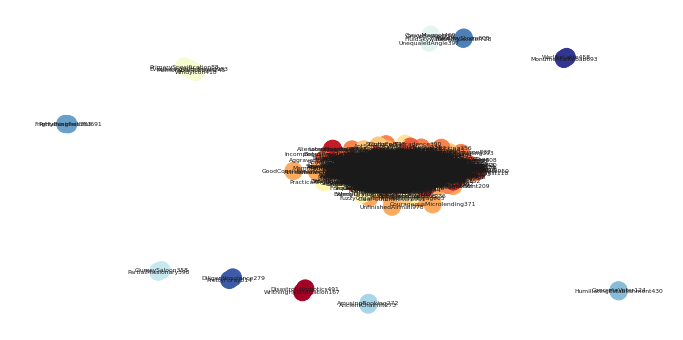

In [ ]:
#Plot with Louvain algortihm
pos = nx.spring_layout(GU)
plt.figure(figsize=(12,6))
plt.axis("off")
nx.draw_networkx_labels(GU,pos,font_size=6)
nx.draw_networkx_nodes(GU, pos,
        cmap=plt.cm.RdYlBu,
        node_color=list(cluster2.values()))
nx.draw_networkx_edges(GU, pos, alpha=0.3)
plt.show(GU)  

In [ ]:


#Find sub-communities with the Louvain method
partition = community_louvain.best_partition(GU)

#Add sub-communities as Groups
nx.set_node_attributes(G, partition, "group")

#Find most influential nodes of the network
top_influencers_nodes=nx.voterank(G,number_of_nodes=15)

#VISUALISE
stylized_network, config = wulf.visualize(G,config=netwulf_config)

AttributeError: ignored

## Information Diffusion

In order to identify if our top user is able to transport information efficiently, we will use a SIR model to compare it against the node with the least centrality measures.

Hide Warnings

In [ ]:
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

### Creating Epidemic Model Using SIR

In [ ]:
! pip install ndlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 110 kB 5.0 MB/s 


In [ ]:
import ndlib.models.epidemics as ep

In [ ]:
import ndlib.models.ModelConfig as mc
from ndlib.viz.bokeh.MultiPlot import MultiPlot
from bokeh.io import output_notebook, show
from ndlib.viz.bokeh.DiffusionTrend import DiffusionTrend
output_notebook()
print('On the Left Graphs, we can see user JovialSpeaker87, with a PageRank of score of 0.01177. On the right graphs, we see TraumaticChopsticks461, which is the user with the smallest betweenness centrality measure')
print('Both users were compared by varying the Beta and Gamma parameters to simulate different infectiousness rates')
for i in [0.01, 0.05, 0.1,0.2]:
    model = ep.SIRModel(G)
    # Model Configuration (best user)
    config = mc.Configuration()
    config.add_model_parameter('beta', i)
    config.add_model_parameter('gamma', i/2)
    config.add_model_initial_configuration("Infected", ['JovialSpeaker297'])
    #config.add_model_parameter("fraction_infected", 0.05)
    model.set_initial_status(config)
    iterations = model.iteration_bunch(60)
    trends = model.build_trends(iterations)
    viz = DiffusionTrend(model, trends)
    p = viz.plot(width=400, height=400)
    
    #second model (worst user)
    model = ep.SIRModel(G)
    # Model Configuration
    config = mc.Configuration()
    config.add_model_parameter('beta', i)
    config.add_model_parameter('gamma', i/2)
    config.add_model_initial_configuration("Infected", ['TraumaticChopsticks461'])
    #config.add_model_parameter("fraction_infected", 0.05)
    model.set_initial_status(config)
    iterations = model.iteration_bunch(60)
    trends = model.build_trends(iterations)
    viz2 = DiffusionTrend(model, trends)
    p2 = viz2.plot(width=400, height=400)
    
    vm = MultiPlot()
    vm.add_plot(p)
    vm.add_plot(p2)
    m = vm.plot()
    show(m);

On the Left Graphs, we can see user JovialSpeaker87, with a PageRank of score of 0.01177. On the right graphs, we see TraumaticChopsticks461, which is the user with the smallest betweenness centrality measure
Both users were compared by varying the Beta and Gamma parameters to simulate different infectiousness rates


In [ ]:
def sort_and_small_dict(d, n):
    sorted_dict = collections.OrderedDict(sorted(d.items(), key=lambda x: -x[1]))
    firstnpairs = list(sorted_dict.items())[:n]
    return firstnpairs

def centrality_to_str_arr(centrality):
    str_arr = []
    for item in centrality:
        str_arr.append(item[0] + ' | ' + str(round(item[1], 2)))
    return str_arr

def fit_powerlaw(degrees, counts):
    if min(degrees) == 0:
        x = degrees[:-1]
        y = counts[:-1]
    else:
        x = degrees
        y = counts

    def powerlaw(x, a, b):
        return a * (x ** b)

    pars, covar = scipy.optimize.curve_fit(powerlaw, x, y)

    approx = []
    for elem in x:
        approx.append(powerlaw(elem, *pars))

    return (x, approx, pars)



In [ ]:
walktrap = g_data.community_walktrap()

In [ ]:
print(walktrap)

Dendrogram, 3520 elements, 3253 merges


In [ ]:
walktrap.optimal_count

410

In [ ]:
print(walktrap.as_clustering(300))

Clustering with 3520 elements and 300 clusters
[  0] 52660, 8919, 20432, 19538, 17016, 48566, 29663, 23263, 42131, 4017,
      11655, 26444, 69738, 19172, 48204, 30650, 16956, 13978, 28076, 41632,
      32135, 17612, 682, 5124, 5642, 15012, 10905, 4082, 41226, 21905, 11479,
      37705, 15701, 10449, 20055, 20501, 41172, 27744, 11334, 31073, 28117,
      12569, 28572, 1922, 21630, 28066, 11228, 14085, 19510, 624, 8488, 40349,
      15837, 34892, 7051, 19216, 19460, 50102, 28488, 50174, 51145, 48935,
      4041, 23536, 36806, 21312, 42176, 41014, 10467, 55782, 3473, 14906,
      53908, 27188, 6536, 13759, 54165, 10987, 40675, 35451, 32541, 41692,
      11667, 19100, 2966, 36561, 12091, 8611, 5660, 26218, 10184, 18541,
      23365, 54422, 7558, 2810, 18857, 25490, 4161, 18371, 28051, 25236,
      20904, 17592, 8388, 2803, 28068, 20529, 42279, 10259, 14006, 59262,
      27552, 11967, 33722, 10790, 54279, 59147, 25108, 8572, 35618, 44160,
      6880, 13822, 20937, 27435, 55600, 6939, 43272

In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms.community.centrality import girvan_newman
ggn = girvan_newman(G, most_valuable_edge=None)

# No Corre

In [ ]:
tuple(sorted(c) for c in next(ggn))

KeyboardInterrupt: ignored

# No Corre

In [ ]:
print(f'Girvman:{ggn}')
pos = nx.spiral_layout(G)
nx.draw(G, pos, with_labels = True, node_color="#f86e00")

plt.show()

In [ ]:
G

In [ ]:
#print(f'Page rank value:{ppr1}')
#pos = nx.spiral_layout(G)
#nx.draw(G, pos, with_labels = True, node_color="#f86e00")
#plt.show()

In [ ]:
#plt.figure(figsize=(20, 20))
#plt.axis('off')
#nx.draw(G, with_labels = False)


In [ ]:
len(G.nodes), len(G.edges)

(3264, 29755)

In [ ]:
def edge_to_remove(graph):
  G_dict = nx.edge_betweenness_centrality(graph)
  edge = ()

  # extract the edge with highest edge betweenness centrality score
  for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True):
      edge = key
      break

  return edge

In [ ]:
def girvan_newman(graph):
	# find number of connected components
	sg = nx.connected_components(graph)
	sg_count = nx.number_connected_components(graph)

	while(sg_count == 1):
		graph.remove_edge(edge_to_remove(graph)[0], edge_to_remove(graph)[1])
		sg = nx.connected_components(graph)
		sg_count = nx.number_connected_components(graph)

	return sg

In [ ]:
# find communities in the graph
c = girvan_newman(G.copy(),)

# find the nodes forming the communities
node_groups = []

for i in c:
  node_groups.append(list(i))

NetworkXNotImplemented: not implemented for directed type

In [ ]:
# Returns the shortest path between each node
nx.shortest_path(G)

KeyboardInterrupt: 

In [ ]:
c_degree = nx.degree_centrality(G)
c_degree = list(c_degree.values())

In [ ]:
c_eigenvector = nx.eigenvector_centrality(G)
c_eigenvector = list(c_eigenvector.values())

In [ ]:
c_closeness = nx.closeness_centrality(G)
c_closeness = list(c_closeness.values())

In [ ]:
c_betweenness = nx.betweenness_centrality(G)
c_betweenness = list(c_betweenness.values())

Text(0.5, 1.0, 'Betweenness Centrality')

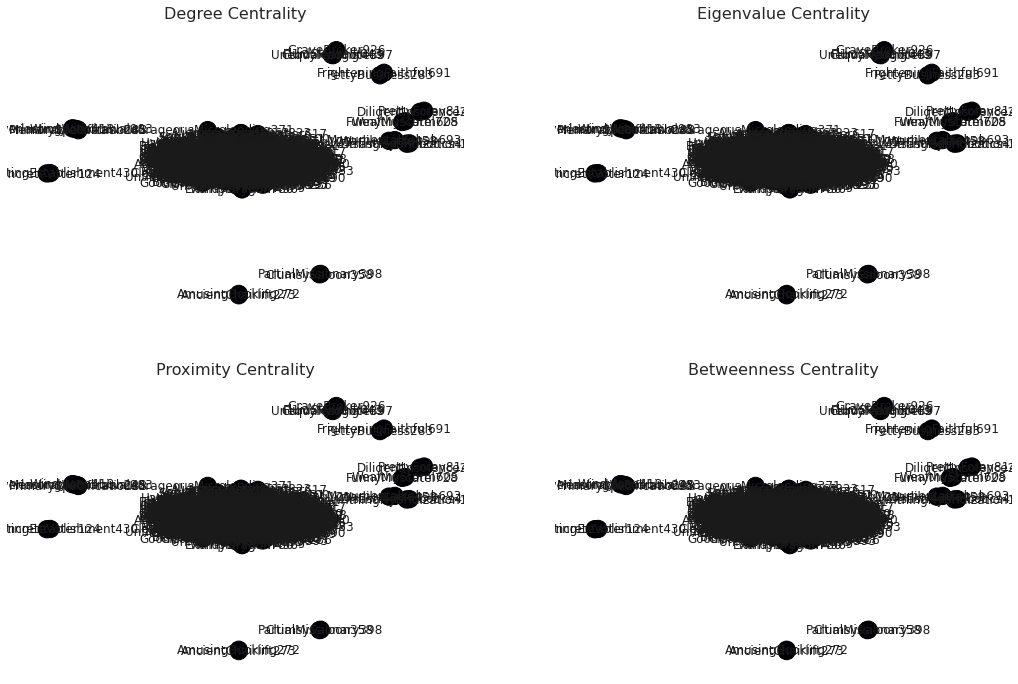

In [ ]:
# Plot the centrality of the nodes
plt.figure(figsize=(18, 12))
f, axarr = plt.subplots(2, 2, num=1)
plt.sca(axarr[0,0])
nx.draw(G, cmap = plt.get_cmap('inferno'), node_color = c_degree, node_size=300, pos=pos, with_labels=True)
axarr[0,0].set_title('Degree Centrality', size=16)

plt.sca(axarr[0,1])
nx.draw(G, cmap = plt.get_cmap('inferno'), node_color = c_eigenvector, node_size=300, pos=pos, with_labels=True)
axarr[0,1].set_title('Eigenvalue Centrality', size=16)

plt.sca(axarr[1,0])
nx.draw(G, cmap = plt.get_cmap('inferno'), node_color = c_closeness, node_size=300, pos=pos, with_labels=True)
axarr[1,0].set_title('Proximity Centrality', size=16)

plt.sca(axarr[1,1])
nx.draw(G, cmap = plt.get_cmap('inferno'), node_color = c_betweenness, node_size=300, pos=pos, with_labels=True)
axarr[1,1].set_title('Betweenness Centrality', size=16)